In [1]:
# setup
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pprint import pprint
#%matplotlib inline

print(tf.__version__)

2.4.1


In [2]:
# soynlp로 텍스트 토큰화

In [3]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x22a036c5e50>)

In [4]:
# 훈련 데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [5]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 0.909 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


In [6]:
print(word_score_table)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
from soynlp.tokenizer import MaxScoreTokenizer
scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
f = open("F:/news/newss/news1.txt", 'r',encoding="utf-8")
text=f.read()
news = np.loadtxt(f, delimiter = ',', dtype = 'str')
#news = np.loadtxt('', delimiter = ',', skiprows = 1, dtype = 'str')

#print(news)
 
#print(text)
wordList = text.split()
 
wordCount = {}
sort_keys=[]
for word in wordList:
    # Get 명령어를 통해, Dictionary에 Key가 없으면 0리턴
    wordCount[word] = wordCount.get(word, 0) + 1 
    keys = sorted(wordCount.keys())
    sort_keys.append(keys)
    

print(wordCount)

#sort_keys = sorted(sort_keys)
#for word in keys:
#    wordCount[word] >= np.average(sort_keys)


#for word in keys:
   #wordCount[word] >= 
    
#for word in keys:
#    print(word + ':' + str(wordCount[word]))
          
#a=maxscore_tokenizer.tokenize(news)

{'삼성디스플레이가': 2, 'OLED(올레드)': 1, '노트북에서': 1, '‘다크': 1, '모드’를': 1, '적용하면': 1, '디스플레이': 2, '소비전력': 1, '25%를': 1, '아낄': 1, '수': 2, '있다고': 1, '6일': 1, '밝혔다.': 1, 'IT': 2, '업계에서': 1, '노트북의': 2, '배터리': 3, '성능을': 1, '평가할': 1, '때': 2, '주로': 1, '사용하는': 1, '기준인': 1, '‘모바일': 1, '마크': 1, '2018’1)': 1, '시나리오에': 1, '따라': 1, 'OLED': 2, '사용시간을': 1, '측정한': 1, '결과,': 1, '화이트': 1, '모드에서는': 2, '9.9시간,': 1, '다크': 8, '11시간으로': 1, '나타났다.': 1, '모드를': 4, '적용했을': 1, '화면을': 1, '구성하는': 1, '전체': 1, '픽셀': 1, '중': 1, '작동하는': 1, '픽셀의': 1, '비율을': 1, '나타내는': 1, '‘OPR(On': 1, 'Pixel': 1, 'Ratio)’이': 1, '감소하면서': 1, '소비전력이': 3, '25%': 1, '줄었고,': 1, '이로': 2, '인해': 2, '노트북': 4, '사용': 1, '시간은': 1, '약': 1, '1시간': 1, '정도': 1, '늘었다.': 1, '이런': 2, '절약': 1, '효과는': 1, '디스플레이가': 1, 'OLED일': 1, '경우에만': 1, '가능하다.': 1, '삼성디스플레이는': 2, '“픽셀': 1, '하나하나가': 1, '스스로': 1, '빛을': 1, '내는': 1, 'OLED는': 1, '픽셀을': 1, '끄는': 1, '방식으로': 1, '검은': 2, '색을': 1, '표현하는데,': 1, '이때는': 1, '일종의': 1, '암전': 1, '상태이기': 1, '때문에': 1, '현저하게': 1, '줄어든다“며': 1, '”반면': 1

<ipython-input-7-dd6e9a45578a>:6: UserWarning: loadtxt: Empty input file: "<_io.TextIOWrapper name='F:/news/newss/news1.txt' mode='r' encoding='utf-8'>"
  news = np.loadtxt(f, delimiter = ',', dtype = 'str')


In [9]:
vector = np.array(wordCount.values())
#print(list(wordCount.values()))
a = list(wordCount.values())
print(a)
#print(wordCount.values())

[2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 8, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [35]:
new_array = np.array(a)
print(new_array)

['삼성' '전자' '가' "'" '패밀리' "허브'" '기능을' '갖춘' '비' '스포' '크(BESPOKE)' '냉장고'
 '신제품을' '3일' '출시한다' '.' '비' '스포' '크' '냉장고' '패밀리' '허브는' '인공지능' '(AI)과' '사물'
 '인터넷' '(IoT)을' '접목해' '식자재' '관리' ',' '가족' '간' '커뮤니케이션' ',' '엔터테인먼트' ','
 '스마트' '홈' '등의' '기능을' '수행' '하는' '제품' '으로' ',' '그' '혁신' '성을' '인정' '받아' '20'
 '16년' '첫' '선을' '보인' '이래' '6년' '연속' 'CES' '혁신' '상을' '수상' '했다' '.' '이' '제품'
 '은' '특히' '식품' '자동' '인식,' '맞춤형' '식단' '추천' '등의' '기능을' '구현' '하는' "'" '푸드'
 "AI'" '기술이' '적용' '돼' '식재료를' '편리하게' '관리' '할' '수' '있다' '는' '점' '에서' '호평'
 '받아' '왔다' '.' '비' '스포' '크' '패밀리' '허브는' '고도화' '된' '식품' '자동' '인식' '기술로'
 '보관' '중인' '다양한' '식재료를' '스스로' '파악하' '며,' '인식된' '식재료' '는' "'" '푸드' '리스트'
 "'에" '추가' '해' '관리' '할' '수' '있다' '.' '푸드' '리스트' '의' '식재료' '나' '가족' '구성'
 '원의' '음식' '취향을' '바탕' '으로' '최적의' '식단과' '레시피를' '제안' '하는' '기능의' '경우' ','
 '식재료' '선호도' '에서' '부터' '다이어트' ',' '영양' '등' '총' '7가지로' '세분화된' '옵션' '을'
 '선택할' '수' '있어' '한층' '진화된' '개인' '맞춤형' '식단을' '제공한다' '.' '추천' '레시피' '에서'
 '제공하는' '조리' '모드나' '시간' ',' '온도는' '삼성' '직화오븐이나' '전자레인지' '로' '곧

2.4.1


In [4]:
news_dir = "F:/news/newss"
directory_txt = tf.keras.preprocessing.text_dataset_from_directory(
    news_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    batch_size=32,
    max_length=None,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    follow_links=False,
)

Found 0 files belonging to 0 classes.


TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=" ",
    char_level=False,
    oov_token=None,
    document_count=0
)
tokenizer.fit_on_texts(news)
word_index = tokenizer.word_index
print(word_index)

{}


In [35]:
train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

for s in text:
    train_sentences.append(s)
#    train_labels.append(l.numpy())

for s in text:
    test_sentences.append(s)
#    test_labels.append(l.numpy())

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length)

print(sequences[0])
print(padded[0])

print(test_sequences[0])
print(test_padded[0])

[17]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]
[17]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]


In [ ]:
# example data
sentences = [['I', 'feel', 'hungry'],
     ['tensorflow', 'is', 'very', 'difficult'],
     ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
     ['tensorflow', 'is', 'very', 'fast', 'changing']]
pos = [['pronoun', 'verb', 'adjective'],
     ['noun', 'verb', 'adverb', 'adjective'],
     ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
     ['noun', 'verb', 'adverb', 'adjective', 'verb']]

In [ ]:
# creating a token dictionary for word
word_list = sum(sentences, [])
word_list = sorted(set(word_list))
word_list = ['<pad>'] + word_list
word2idx = {word : idx for idx, word in enumerate(word_list)}
idx2word = {idx : word for idx, word in enumerate(word_list)}

print(word2idx)
print(idx2word)
print(len(idx2word))

In [ ]:
# creating a token dictionary for part of speech
pos_list = sum(pos, [])
pos_list = sorted(set(pos_list))
pos_list = ['<pad>'] + pos_list
pos2idx = {pos : idx for idx, pos in enumerate(pos_list)}
idx2pos = {idx : pos for idx, pos in enumerate(pos_list)}

print(pos2idx)
print(idx2pos)
print(len(pos2idx))

In [ ]:
# converting sequence of tokens to sequence of indices
max_sequence = 10
x_data = list(map(lambda sentence : [word2idx.get(token) for token in sentence], sentences))
y_data = list(map(lambda sentence : [pos2idx.get(token) for token in sentence], pos))

# padding the sequence of indices
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence, padding='post')
x_data_mask = ((x_data != 0) * 1).astype(np.float32)
x_data_len = list(map(lambda sentence : len(sentence), sentences))

y_data = pad_sequences(sequences = y_data, maxlen = max_sequence, padding='post')

# checking data
print(x_data, x_data_len)
print(x_data_mask)
print(y_data)

In [ ]:
# creating bidirectional rnn for "many to many" sequence tagging
num_classes = len(pos2idx)
hidden_dim = 10

input_dim = len(word2idx)
output_dim = len(word2idx)
one_hot = np.eye(len(word2idx))

model = Sequential()
model.add(layers.InputLayer(input_shape=(max_sequence,)))
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim, mask_zero=True,
                                 trainable=False, input_length=max_sequence,
                                 embeddings_initializer=keras.initializers.Constant(one_hot)))
model.add(layers.Bidirectional(keras.layers.SimpleRNN(units=hidden_dim, return_sequences=True)))
model.add(layers.TimeDistributed(keras.layers.Dense(units=num_classes)))

In [ ]:
#training
# creating loss function
def loss_fn(model, x, y, x_len, max_sequence):
    masking = tf.sequence_mask(x_len, maxlen=max_sequence, dtype=tf.float32)
    valid_time_step = tf.cast(x_len,dtype=tf.float32)
    sequence_loss = tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=model(x), from_logits=True) * masking
    sequence_loss = tf.reduce_sum(sequence_loss, axis=-1) / valid_time_step
    sequence_loss = tf.reduce_mean(sequence_loss)
    return sequence_loss

In [ ]:
# creating and optimizer
lr = 0.1
epochs = 30
batch_size = 2
opt = tf.keras.optimizers.Adam(learning_rate = lr)

# generating data pipeline
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data, x_data_len))
tr_dataset = tr_dataset.shuffle(buffer_size=4)
tr_dataset = tr_dataset.batch(batch_size = 2)

print(tr_dataset)

2.4.1
{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}
{0: '<pad>', 1: 'I', 2: 'a', 3: 'changing', 4: 'deep', 5: 'difficult', 6: 'fast', 7: 'feel', 8: 'for', 9: 'framework', 10: 'hungry', 11: 'is', 12: 'learning', 13: 'tensorflow', 14: 'very'}
15
{'<pad>': 0, 'adjective': 1, 'adverb': 2, 'determiner': 3, 'noun': 4, 'preposition': 5, 'pronoun': 6, 'verb': 7}
{0: '<pad>', 1: 'adjective', 2: 'adverb', 3: 'determiner', 4: 'noun', 5: 'preposition', 6: 'pronoun', 7: 'verb'}
8
[[ 1  7 10  0  0  0  0  0  0  0]
 [13 11 14  5  0  0  0  0  0  0]
 [13 11  2  9  8  4 12  0  0  0]
 [13 11 14  6  3  0  0  0  0  0]] [3, 4, 7, 5]
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
[[6 7 1 0 0 0 0 0 0 0]
 [4 7 2 1 0 0 0 0 0 0]
 [4 7 3 4 5 1 4 0 0 0]
 [4 7 2 1 7 0 0 0 0 0]]
<BatchDataset

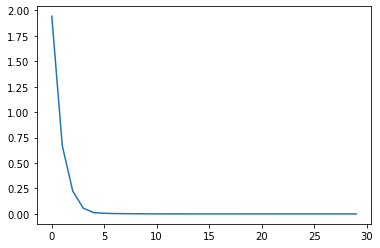

In [1]:
# training
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0

    for x_mb, y_mb, x_mb_len in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb, x_len=x_mb_len, max_sequence=max_sequence)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)

    if (epoch + 1) % 5 == 0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss))

yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1) * x_data_mask

pprint(list(map(lambda row : [idx2pos.get(elm) for elm in row],yhat.astype(np.int32).tolist())), width = 120)
pprint(pos)

plt.plot(tr_loss_hist)